In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
TRAIN_DIR = '../input/vcor-vehicle-color-recognition-dataset/train'
VAL_DIR = '../input/vcor-vehicle-color-recognition-dataset/val'
TEST_DIR = '../input/vcor-vehicle-color-recognition-dataset/test'

In [21]:
IMG_SIZE=244  # До каких размеров будут изменены изображения (size*size)
BATCH_SIZE = 64
size_train_samples = 7267
size_val_samples = 1550
size_test_samples = 1556

In [22]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
valgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

# Создание генератора для тренировочных данных
train_generator = traingen.flow_from_directory(
    TRAIN_DIR, 
    class_mode='categorical', 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE
    )

# Создание генератора для валидационных данных
val_generator = valgen.flow_from_directory(
    VAL_DIR, 
    class_mode='categorical', 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
    )

# Создание генератора для тестовых данных
test_generator = testgen.flow_from_directory(
    TEST_DIR, 
    class_mode='categorical',
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE
    )

Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.


In [23]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
model = define_model()
history = model.fit_generator(
    train_generator,
    steps_per_epoch=size_train_samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=size_val_samples // BATCH_SIZE,
    verbose=1
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
113/113 [==============================] - 416s 4s/step - loss: 2.0270 - accuracy: 0.3658 - val_loss: 1.2381 - val_accuracy: 0.6504
Epoch 2/10
113/113 [==============================] - 409s 4s/step - loss: 1.2001 - accuracy: 0.6000 - val_loss: 0.8898 - val_accuracy: 0.7227
Epoch 3/10
113/113 [==============================] - 413s 4s/step - loss: 0.9524 - accuracy: 0.6731 - val_loss: 0.7552 - val_accuracy: 0.7448
Epoch 4/10
113/113 [==============================] - 416s 4s/step - loss: 0.8705 - accuracy: 0.6998 - val_loss: 0.7302 - val_accuracy: 0.7559
Epoch 5/10
113/113 [==============================] - 415s 4s/step - loss: 0.7686 - accuracy: 0.7282 - val_loss: 0.6685 - val_accuracy: 0.7650
Epoch 6/10
113/113 [==============================] - 411s 4s/step - loss: 0.7349 - accuracy: 0.7461 - val_loss: 0.6098 - val_accuracy: 0.7799
Epoch 7/10
113/113 [==============================] - 408s 4s/step - loss: 0.6762 - accuracy: 0.7679 - val_loss: 0.6049 - val_accuracy: 0.7871

In [25]:
loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
acc

0.7924164533615112

In [26]:
import matplotlib.pyplot as plt
import sys
# plot diagnostic learning curves
def show_training_curves(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

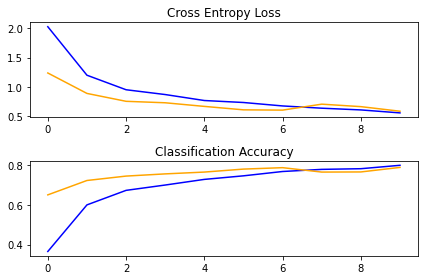

In [27]:
show_training_curves(history)

In [35]:
model.save('CNN2.h5')

In [36]:
loaded_model = keras.models.load_model('/kaggle/working/CNN.h5')

In [37]:
loaded_model.evaluate(test_generator)

25/25 [==============================] - 22s 861ms/step - loss: 0.6075 - accuracy: 0.7924


[0.6075097918510437, 0.7924164533615112]